In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np
from glob import *

In [3]:
# set input file path
data_folder = glob("GaiaSource/*.csv")
#señales = glob("señales/*.fits")
print(data_folder)

['GaiaSource\\GaiaSource-1000172165251650944-1000424567594791808.csv', 'GaiaSource\\GaiaSource-1000424601954531200-1000677322125743488.csv', 'GaiaSource\\GaiaSource-4062354100635886976-4062354964013844992.csv', 'GaiaSource\\GaiaSource-999717001796824064-999922369954904960.csv', 'GaiaSource\\GaiaSource-999922404314639104-1000172126596665472.csv']


In [4]:
# read csv into dataframe using a lambda function
dfraw = pd.concat([pd.read_csv(f) for f in (data_folder)], ignore_index = True)

In [5]:
# clean up NaN values (it's a bit nasty to do it this way but hey! I'm still a beginner)
gaiaHR = dfraw[np.isfinite(dfraw['lum_val'])]
gaiaHR = dfraw[np.isfinite(dfraw['astrometric_pseudo_colour'])]
print(gaiaHR.shape)

(53092, 94)


In [6]:
x = gaiaHR['astrometric_pseudo_colour']
y = gaiaHR['lum_val']

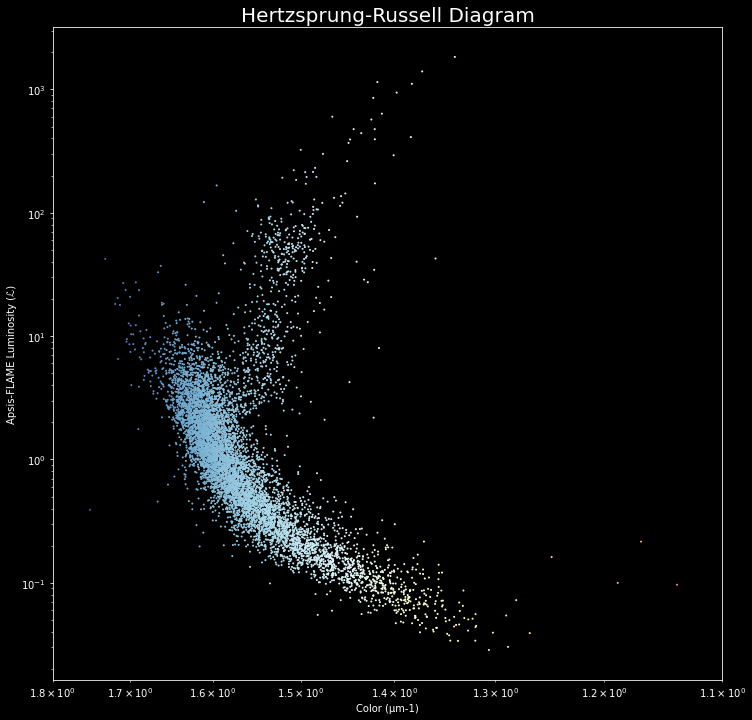

In [10]:
fig1 = plt.figure(figsize=(12,12))

plt.style.use('dark_background')
plt.yscale('log')
plt.xscale('log')
plt.title('Hertzsprung-Russell Diagram',fontsize=20)
plt.xlabel('Color (μm-1)')
plt.ylabel('Apsis-FLAME Luminosity (ℒ)')
plt.scatter(x, y, s=1, c=x ,cmap=plt.get_cmap('RdYlBu'))
plt.xlim(xmax=1.8)
plt.xlim(xmin=1.1)
plt.gca().invert_xaxis()
plt.show()